# Probabilistic PCA

Here is my probabilistic PCA implementation based on equations from "Pattern Recognition and Machine Learning" by C. Bishop book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from keras.datasets import mnist

Using TensorFlow backend.


## Prepare dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_train = x_train.reshape(60000, -1)
x_train = x_train[y_train == 5,:]

## Probabilistic PCA class

In [3]:
class PPCA():
    '''
    X - dataset
    x - data point
    z - laten variable
    
    '''
    def __init__(self,X, M):
        self.D = X.shape[1] # dimension of oryginal data points   
        self.M = M # dimension of reduced data point
        self.X = X #dataset
        self.calculate_parameters()
    def calculate_parameters(self):
        '''
        Determine parameteres of the model by optimizing likelihood function. 
        It involves caltulating mean, variance and W matrix.
        '''
        self.mean = self.X.mean(axis = 0)
        
        covariance = np.cov(self.X, rowvar = False)
        eig_val, eig_vec = np.linalg.eig(covariance)
        idx = np.argsort(eig_val)[::-1]
        eig_val = np.real(eig_val[idx])
        eig_vec = np.real(eig_vec[:, idx])
        
        self.sigma = 1/(self.D - self.M) * np.sum(eig_val[self.M+1:])
        
        U_M = eig_vec[:, :self.M]
        L_M = np.diag(eig_val[:self.M])
        self.W_ML = np.dot(U_M, np.sqrt(L_M - self.sigma*np.eye(self.M)))
    def sample_x(self):
        '''
        Sample from p(x) distribution
        '''
        mean = self.mean
        C = np.dot(self.W_ML, self.W_ML.T) + self.sigma * np.eye(self.D)
        distribution = stats.multivariate_normal(mean, C)
        return distribution.rvs()
    def sample_z(self):
        '''
        Sample from p(z) distribution
        '''
        model = stats.multivariate_normal(np.zeros(shape = self.M), np.eye(self.M))
        return distribution.rvs()
    def sample_x_given_z(self, z):
        '''
        Sample from p(x|z) distribution'
        '''
        distribution = stats.multivariate_normal(np.dot(self.W_ML, z) + self.mean, self.sigma * np.eye(self.D))
        return distribution.rvs()
    def sample_z_given_x(self, x):
        '''
        Sample from p(z|x) distribution
        '''
        M_matrix = np.dot(self.W_ML.T, self.W_ML) + self.sigma * np.eye(self.M)
        M_matrix_inv = np.linalg.inv(M_matrix)
        print(M_matrix_inv.shape, )
        mean = np.linalg.multi_dot([M_matrix_inv, self.W_ML.T, (x - self.mean)])
        variance = self.sigma * M_matrix_inv                                    
        distribution = stats.multivariate_normal(mean, variance)
        return distribution.rvs()
                                        
        
        

## Sample from p(x) distribution

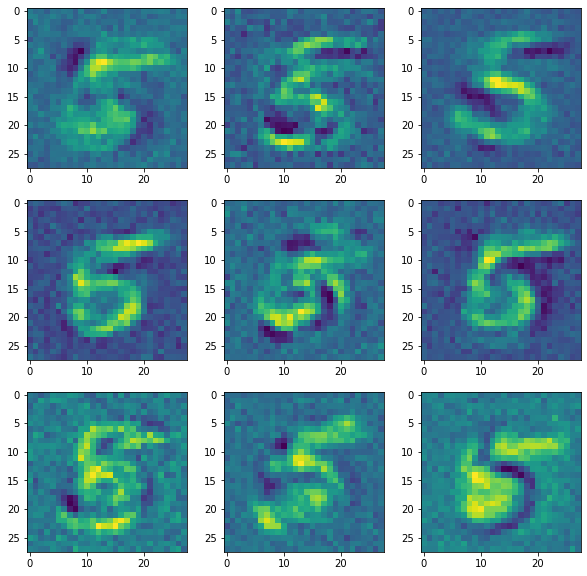

In [4]:
model = PPCA(x_train, 50)
plt.figure(figsize =(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(model.sample_x().reshape(28,28))

## Show the original image

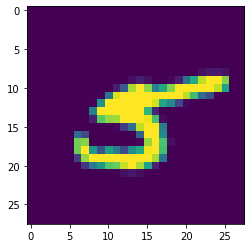

In [5]:
idx = np.random.randint(0, x_train[0].shape[0])
plt.imshow(x_train[idx,:].reshape(28,28))

## Show the reconstructions

(50, 50)


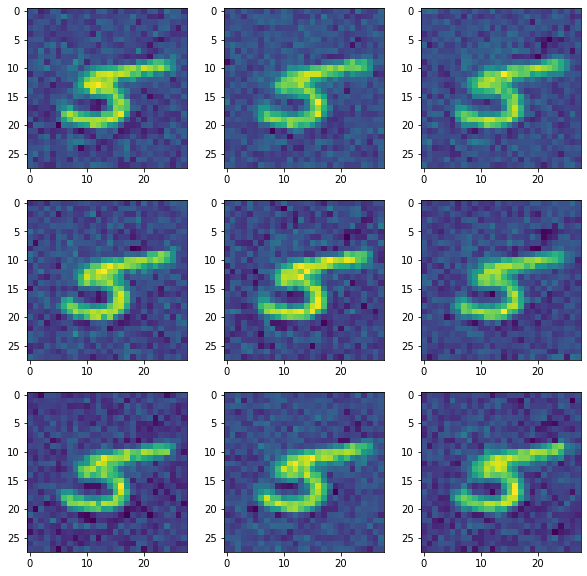

In [6]:
z = model.sample_z_given_x(x_train[idx,:]) # get latent variable

plt.figure(figsize =(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    image = model.sample_x_given_z(z)
    plt.imshow(image.reshape(28,28))